In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Reet\Desktop\Datasets\Personality\archive\marketing_campaign.csv')

In [3]:
len(df)

2240

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [7]:
### want to find out the most reliable client ####

In [8]:
### EDA for understaning the behavior of the customer


#finding correlation between customers.

df_corr = df.corr()

df_corr

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,1.000000,0.000028,0.013095,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,-0.007642,-0.013438,-0.037166,-0.018924,-0.003440,-0.014927,-0.007446,-0.036040,-0.025387,-0.007517,-0.021614,-0.015061,0.033883,NaN,NaN,-0.021968
Year_Birth,0.000028,1.000000,-0.161791,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,-0.018133,-0.061818,-0.060846,-0.145040,-0.121275,-0.128272,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,NaN,NaN,0.021325
Income,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,0.440744,0.325916,-0.083101,0.387878,0.589162,0.529362,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,NaN,NaN,0.133047
Kidhome,0.002406,0.230176,-0.428669,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,-0.349595,0.221798,-0.361647,-0.502237,-0.499683,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,NaN,NaN,-0.080008
Teenhome,-0.002580,-0.352111,0.019133,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,-0.021725,0.387741,0.155500,-0.110769,0.050695,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,NaN,NaN,-0.154446
Recency,-0.046524,-0.019871,-0.003970,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,0.016693,-0.001098,-0.010726,0.025110,0.000799,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,NaN,NaN,-0.198437
MntWines,-0.022878,-0.157773,0.578650,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516,0.010940,0.542265,0.635226,0.642100,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,NaN,NaN,0.247254
MntFruits,0.004600,-0.017917,0.430842,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995,-0.132114,0.296735,0.487917,0.461758,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,NaN,NaN,0.125289
MntMeatProducts,-0.004437,-0.030872,0.584633,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609,-0.122415,0.293761,0.723827,0.479659,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,NaN,NaN,0.236335
MntFishProducts,-0.024475,-0.041625,0.438871,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875,-0.139361,0.293681,0.534478,0.459855,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,-0.020953,NaN,NaN,0.111331


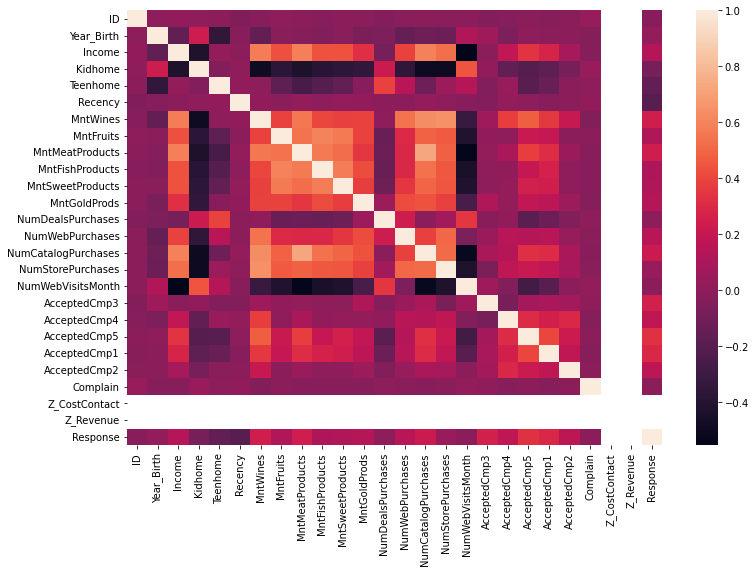

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df_corr)
plt.show()

In [10]:
!pip install pandasql

In [11]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [12]:
df.head(13)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,9/9/2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,8/5/2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,6/6/2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [13]:
## Avg of Income##

print(df['Income'].mean())

### 

52247.25135379061


In [14]:

### Seperating the customer details df from their buying informations df

###

df2 = """SELECT ID,Year_Birth,Education,Marital_Status,Income
       FROM df
       WHERE EDUCATION > 'Graduation' AND Education >= 'Graduation';"""

df2 = pysqldf(df2)

df2

,ID,Year_Birth,Education,Marital_Status,Income
0,5324,1981,PhD,Married,58293.0
1,7446,1967,Master,Together,62513.0
2,6177,1985,PhD,Married,33454.0
3,4855,1974,PhD,Together,30351.0
4,5899,1950,PhD,Together,5648.0
...,...,...,...,...,...
851,4286,1970,PhD,Single,57642.0
852,9817,1970,Master,Single,44802.0
853,4001,1946,PhD,Together,64014.0
854,8235,1956,Master,Together,69245.0


In [15]:
df3 = """SELECT ID,Year_Birth,Income
       FROM df
       WHERE Income > 52247.2513;"""

df3 = pysqldf(df3)
df3

,ID,Year_Birth,Income
0,5524,1957,58138.0
1,4141,1965,71613.0
2,5324,1981,58293.0
3,7446,1967,62513.0
4,965,1971,55635.0
...,...,...,...
1079,10870,1967,61223.0
1080,4001,1946,64014.0
1081,7270,1981,56981.0
1082,8235,1956,69245.0


In [16]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [17]:
### Group By Education And Marital Status
df4_1 = """SELECT ID,Year_Birth,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts
       FROM df
       WHERE Income < 52247.2513
       GROUP BY Marital_Status;"""

df4_1 = pysqldf(df4_1)
print(df4_1)

df4_2 = """SELECT ID,Year_Birth,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts
       FROM df
       WHERE Income > 52247.2513
       GROUP BY Marital_Status;"""

df4_2 = pysqldf(df4_2)
print(df4_2)


#df4_1 = df4_1.append(df4_2)
#df4_1

#print(df4_1)

#plt.figure(figsize=(20,14))

#ax = df4_1[['MntFruits','MntWines','MntMeatProducts','MntFishProducts','MntSweetProducts']].plot.bar(rot=1)
plt.show()

     ID  Year_Birth Marital_Status   Income  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts
0  7660        1973          Alone  35860.0        15          0                8                4                 2
1  6864        1989       Divorced  10979.0         8          4               10                2                 2
2  6177        1985        Married  33454.0        76         10               56                3                 1
3  2174        1954         Single  46344.0        11          1                6                2                 1
4  6182        1984       Together  26646.0        11          4               20               10                 3
5  8595        1973          Widow  42429.0        55          0                6                2                 0
6   492        1973           YOLO  48432.0       322          3               50                4                 3
     ID  Year_Birth Marital_Status   Income  MntWines  MntFruits

     ID  Year_Birth   Income
0  7734        1993  79244.0
1   433        1958  61331.0
2   965        1971  55635.0
3  5324        1981  58293.0
4  5524        1957  58138.0
5  4141        1965  71613.0
6  8614        1957  65486.0


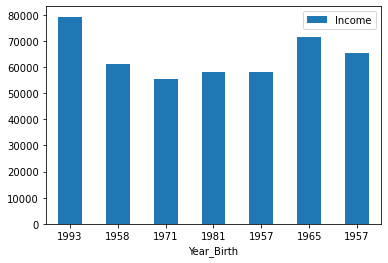

In [18]:
### Group By Marital_Status

df5 = """SELECT ID,Year_Birth,Income
       FROM df
       WHERE Income > 52247.2513
       GROUP BY Marital_Status;"""

df5 = pysqldf(df5)
print(df5)

ax = df5.plot.bar(x='Year_Birth', y='Income', rot=0)
plt.show()

In [19]:
df4_1

,ID,Year_Birth,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts
0,7660,1973,Alone,35860.0,15,0,8,4,2
1,6864,1989,Divorced,10979.0,8,4,10,2,2
2,6177,1985,Married,33454.0,76,10,56,3,1
3,2174,1954,Single,46344.0,11,1,6,2,1
4,6182,1984,Together,26646.0,11,4,20,10,3
5,8595,1973,Widow,42429.0,55,0,6,2,0
6,492,1973,YOLO,48432.0,322,3,50,4,3


In [20]:
df4_2

,ID,Year_Birth,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts
0,7734,1993,Absurd,79244.0,471,102,125,212,61
1,433,1958,Alone,61331.0,534,5,47,0,5
2,965,1971,Divorced,55635.0,235,65,164,50,49
3,5324,1981,Married,58293.0,173,43,118,46,27
4,5524,1957,Single,58138.0,635,88,546,172,88
5,4141,1965,Together,71613.0,426,49,127,111,21
6,8614,1957,Widow,65486.0,245,19,125,37,67


In [21]:
df_new = df4_1.append(df4_2)
df_new

,ID,Year_Birth,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts
0,7660,1973,Alone,35860.0,15,0,8,4,2
1,6864,1989,Divorced,10979.0,8,4,10,2,2
2,6177,1985,Married,33454.0,76,10,56,3,1
3,2174,1954,Single,46344.0,11,1,6,2,1
4,6182,1984,Together,26646.0,11,4,20,10,3
5,8595,1973,Widow,42429.0,55,0,6,2,0
6,492,1973,YOLO,48432.0,322,3,50,4,3
0,7734,1993,Absurd,79244.0,471,102,125,212,61
1,433,1958,Alone,61331.0,534,5,47,0,5
2,965,1971,Divorced,55635.0,235,65,164,50,49


<BarContainer object of 7 artists>

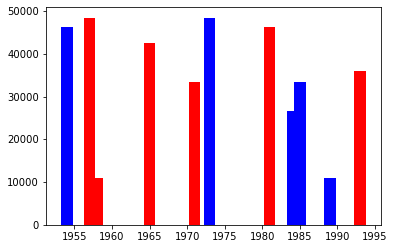

In [22]:
df_new_1 = df4_1.set_index('ID')
df_new_2 = df4_2.set_index('ID')

ax = plt.subplot(111)
ax.bar(df_new_1['Year_Birth'],df_new_1['Income'], width=1.5, color='b', align='center')
ax.bar(df_new_2['Year_Birth'],df_new_1['Income'], width=1.5, color='r', align='center')


In [23]:
##### Predictive Analytics #####

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [24]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

In [25]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])
df['Marital_Status'] = le.fit_transform(df['Marital_Status'])

df = df.dropna()


feature_cols = ['Year_Birth','Education','Marital_Status','Income','Kidhome','Teenhome']
X = df[feature_cols]
y = df[['Response']]

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.8258258258258259


In [26]:
!pip install graphviz

In [27]:
!pip install pydotplus

In [28]:
from sklearn.tree import export_graphviz
from io import StringIO  
from IPython.display import Image
import pydotplus
dot_data = StringIO()

from IPython.display import Image 
export_graphviz(clf,out_file=dot_data,filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


In [29]:
graph

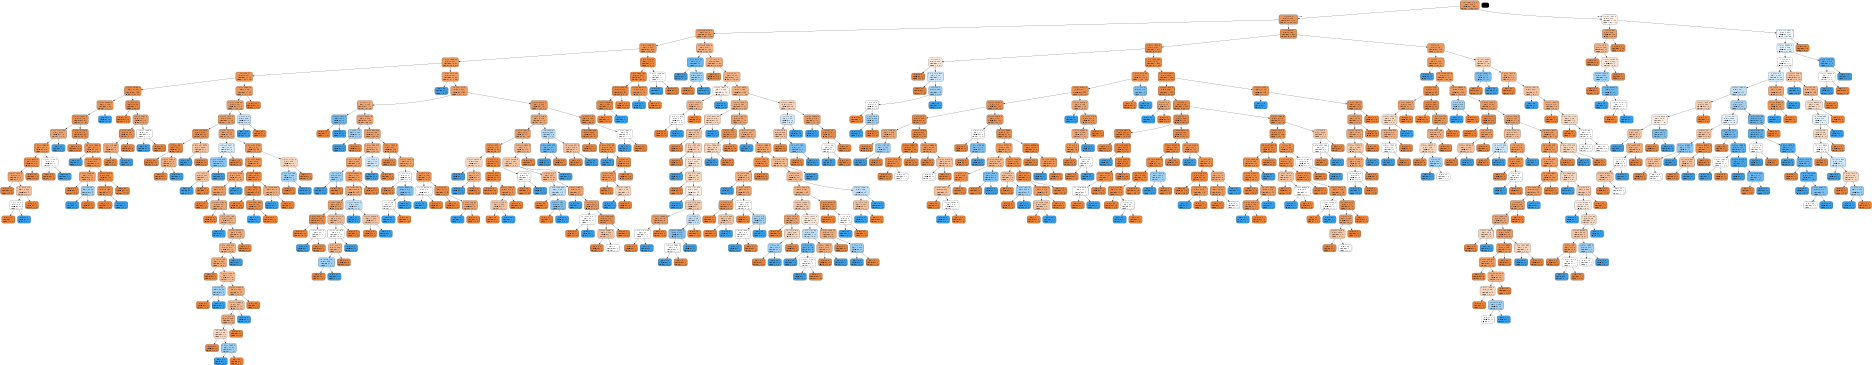

In [34]:
graph.set_size('"19.5,19.5!"')
Image(graph.create_png())